In [1]:
# My Employee Salary Prediction Project
# This notebook details my end-to-end machine learning project for predicting
# whether an individual's annual income is <=50K or >50K based on the Adult Census Income Dataset.

# This project demonstrates my skills in:
# - Data Loading & Initial Inspection
# - Data Cleaning & Preprocessing
# - Exploratory Data Analysis (EDA) & Visualization
# - Feature Engineering
# - Building a Robust Machine Learning Pipeline
# - Model Training & Evaluation
# - Model Saving for Deployment

# Let's start by importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pickle # Essential for saving my trained model for later use (e.g., in a web app)

print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


In [6]:
# Now, I'll load the dataset. This dataset is crucial for training my salary prediction model.
# Make sure 'adult.csv' is in the same directory as this notebook, or provide the full path.
try:
    data = pd.read_csv(r"D:\EmployeeSalaryPrediction\adult.csv")
    print("Dataset 'adult.csv' loaded successfully!")
except FileNotFoundError:
    print("Error: 'adult.csv' not found. Please ensure the file is in the correct directory or provide the full path.")
    # I'll exit here if the data isn't found, as the project can't proceed without it.
    exit()

# Let's get a first look at the data: its shape, first few rows, and column information.
# This helps me understand the structure and data types.
print("\n--- Initial Data Overview ---")
print("First 5 rows of the dataset:")
print(data.head())
print("\nGeneral information about the dataset (columns, non-null counts, data types):")
data.info()
print(f"\nThe dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset 'adult.csv' loaded successfully!

--- Initial Data Overview ---
First 5 rows of the dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                 

In [7]:
# Data cleaning is a critical first step. I noticed that some columns use '?' to represent missing values.
# I'll replace these with 'Unknown' for better handling in my model.
print("--- Starting Data Cleaning ---")

# Replacing '?' in categorical columns. This is a common issue with this dataset.
for col in ['workclass', 'occupation', 'native-country']:
    data[col] = data[col].replace('?', 'Unknown')
    print(f"Replaced '?' with 'Unknown' in '{col}' column.")

# I've also observed some less relevant or very sparse categories in 'workclass'
# like 'Without-pay' and 'Never-worked'. I'll remove these rows to focus on active employees.
initial_rows = data.shape[0]
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
print(f"Removed {initial_rows - data.shape[0]} rows with 'Without-pay' or 'Never-worked' workclass.")

print("\nChecking for any remaining null values:")
print(data.isnull().sum()) # Should show zeros for the columns I just cleaned

# My target variable, 'income', is categorical (<=50K, >50K).
# Machine learning models prefer numerical input, so I'll encode it using LabelEncoder.
# This will transform '<=50K' to 0 and '>50K' to 1.
le_income = LabelEncoder()
data['income_encoded'] = le_income.fit_transform(data['income'])
print("\nTarget variable 'income' successfully encoded:")
for i, label in enumerate(le_income.classes_):
    print(f"'{label}' -> {i}")

print("\nData cleaning complete!")

--- Starting Data Cleaning ---
Replaced '?' with 'Unknown' in 'workclass' column.
Replaced '?' with 'Unknown' in 'occupation' column.
Replaced '?' with 'Unknown' in 'native-country' column.
Removed 31 rows with 'Without-pay' or 'Never-worked' workclass.

Checking for any remaining null values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Target variable 'income' successfully encoded:
'<=50K' -> 0
'>50K' -> 1

Data cleaning complete!


--- Performing Exploratory Data Analysis (EDA) ---


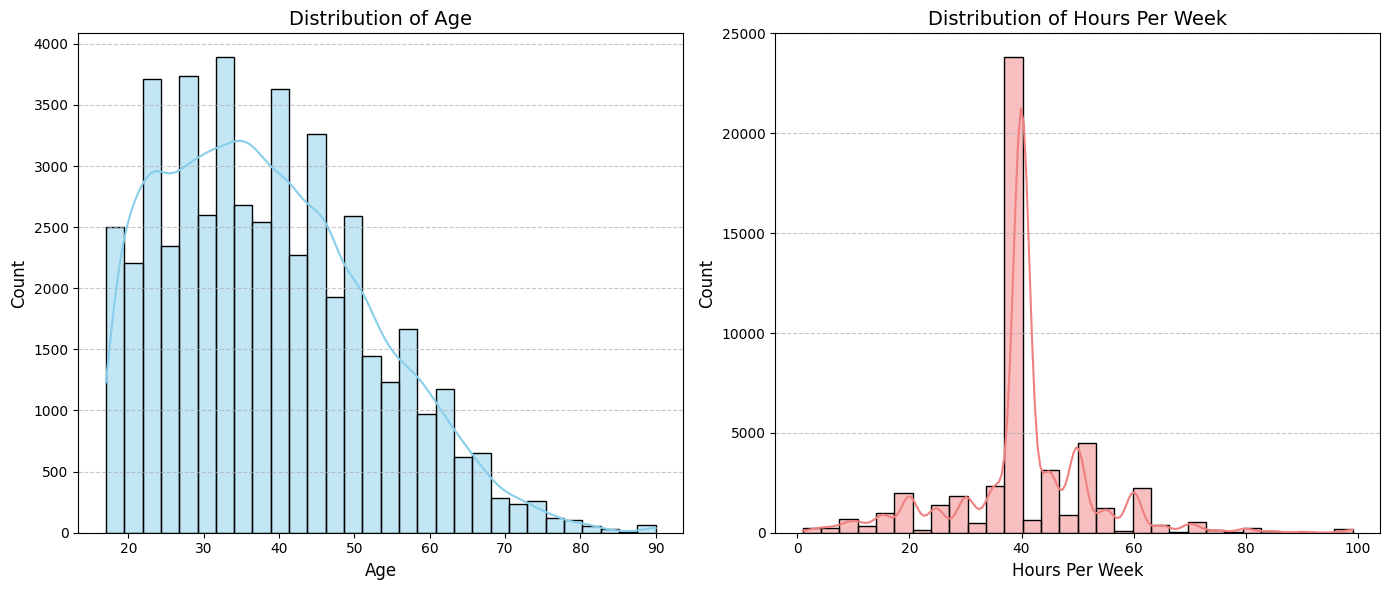

Visualized distributions of 'Age' and 'Hours Per Week'.


In [8]:
# Now that the data is clean, it's time for Exploratory Data Analysis (EDA).
# This helps me understand the patterns, distributions, and relationships within the data
# before I build my predictive model. Visualizations are key here.

print("--- Performing Exploratory Data Analysis (EDA) ---")

# Let's visualize the distribution of numerical features like 'age' and 'hours-per-week'.
# Histograms with KDE (Kernel Density Estimate) help me see their shapes and densities.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # This creates a 1 row, 2 column plot grid, and I'm placing this on the 1st position.
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # Placing this on the 2nd position.
sns.histplot(data['hours-per-week'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Hours Per Week', fontsize=14)
plt.xlabel('Hours Per Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjusts plot parameters for a tight layout.
plt.show()

print("Visualized distributions of 'Age' and 'Hours Per Week'.")

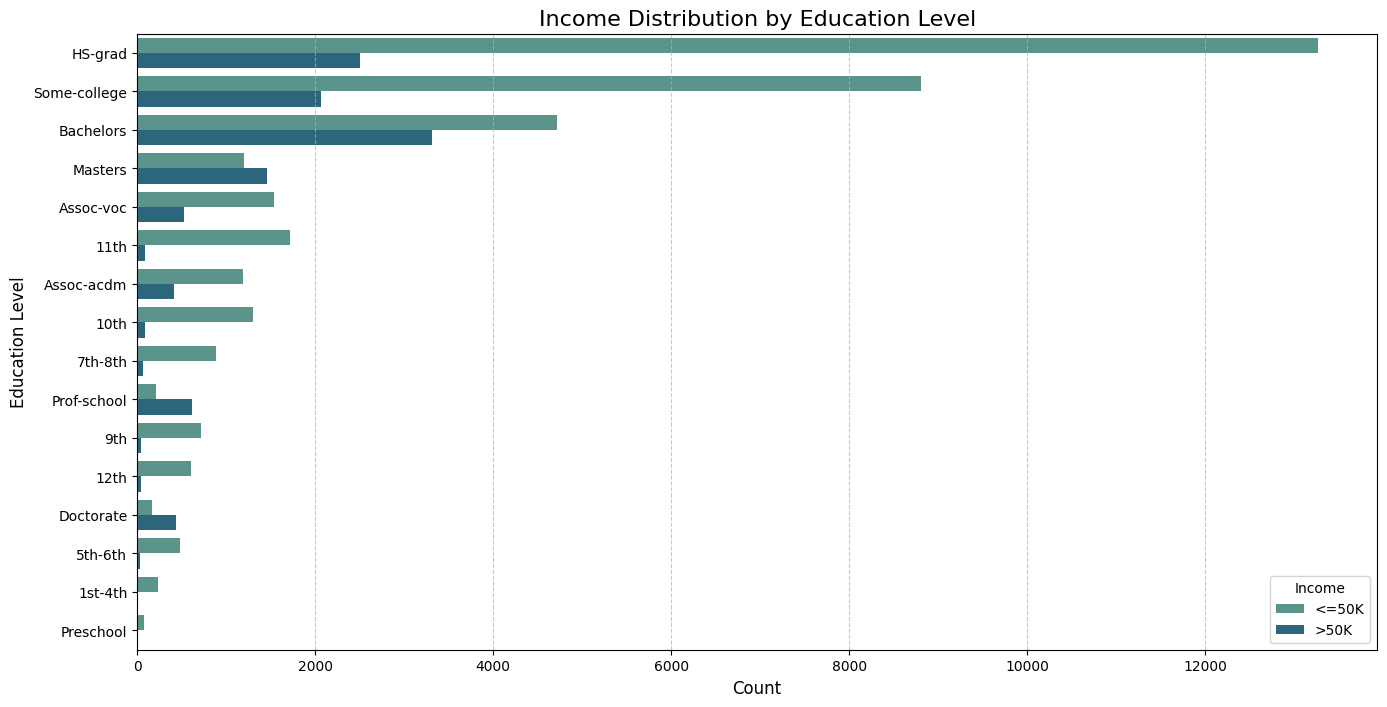

Visualized 'Income' distribution across 'Education Level'.


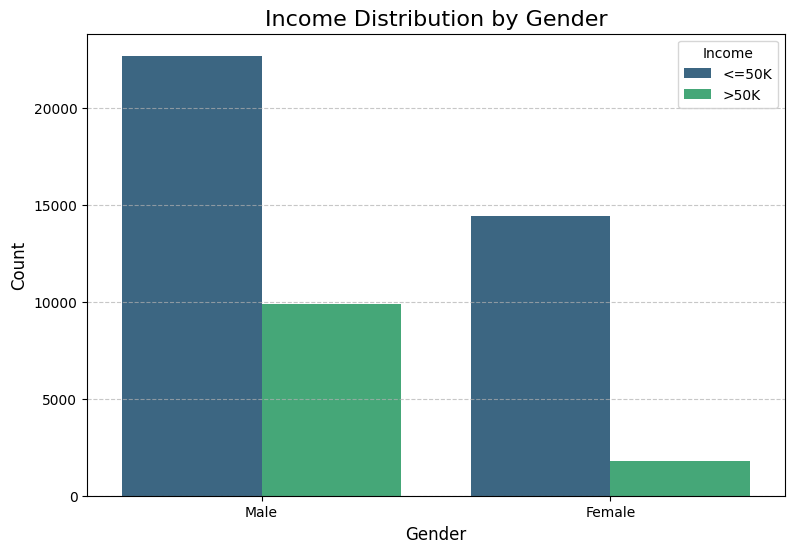

Visualized 'Income' distribution across 'Gender'.


In [9]:
# Continuing with EDA, I want to see how categorical features relate to the 'income' target.
# This helps me identify potential strong predictors.

# Income Distribution by Education Level: A bar plot showing counts for each education level,
# segmented by income bracket. This reveals educational attainment's impact on income.
plt.figure(figsize=(16, 8))
sns.countplot(data=data, y='education', hue='income', order=data['education'].value_counts().index, palette='crest')
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Income')
plt.show()
print("Visualized 'Income' distribution across 'Education Level'.")

# Income Distribution by Gender: Understanding if there's a visible difference in income
# distribution based on gender. This can highlight potential disparities.
plt.figure(figsize=(9, 6))
sns.countplot(data=data, x='gender', hue='income', palette='viridis')
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Income')
plt.show()
print("Visualized 'Income' distribution across 'Gender'.")

# I can add more similar plots for 'workclass', 'occupation', 'marital-status', etc.
# These visualizations provide crucial insights into the dataset's characteristics.

In [10]:
# Feature Engineering is about creating new features or transforming existing ones
# to help my model learn better patterns. This often boosts model performance.

print("--- Performing Feature Engineering ---")

# Feature 1: 'capital_gain_loss_diff'
# Combining 'capital-gain' and 'capital-loss' into a single feature that represents
# the net capital change. This might be a more direct indicator of financial standing.
data['capital_gain_loss_diff'] = data['capital-gain'] - data['capital-loss']
print("\nCreated new feature 'capital_gain_loss_diff' (capital-gain - capital-loss).")
print("Sample values (capital-gain, capital-loss, capital_gain_loss_diff):")
print(data[['capital-gain', 'capital-loss', 'capital_gain_loss_diff']].head())

# Feature 2: 'marital_status_simplified'
# The original 'marital-status' has many categories. I'll group similar ones (e.g., all married types)
# into simpler, more meaningful categories. This reduces dimensionality and potentially
# helps the model generalize better.
data['marital_status_simplified'] = data['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Separated/Divorced',
    'Separated': 'Separated/Divorced',
    'Widowed': 'Widowed'
})
print("\nCreated new feature 'marital_status_simplified' by grouping similar marital statuses.")
print("Value Counts for new simplified feature:")
print(data['marital_status_simplified'].value_counts())

print("\nFeature Engineering complete!")

--- Performing Feature Engineering ---

Created new feature 'capital_gain_loss_diff' (capital-gain - capital-loss).
Sample values (capital-gain, capital-loss, capital_gain_loss_diff):
   capital-gain  capital-loss  capital_gain_loss_diff
0             0             0                       0
1             0             0                       0
2             0             0                       0
3          7688             0                    7688
4             0             0                       0

Created new feature 'marital_status_simplified' by grouping similar marital statuses.
Value Counts for new simplified feature:
marital_status_simplified
Married               23028
Single                16104
Separated/Divorced     8162
Widowed                1517
Name: count, dtype: int64

Feature Engineering complete!


In [11]:
# Before training, I need to split my data into features (X) and the target variable (y).
# Then, I'll set up a preprocessing pipeline to handle both numerical scaling and
# categorical encoding automatically. This ensures consistency and prevents data leakage.

print("--- Preparing Data for Modeling: Splitting and Preprocessing Pipeline ---")

# Define features (X) and target (y)
# I'm dropping the original 'income' column (as I have 'income_encoded'),
# 'fnlwgt' (often considered irrelevant for prediction), and the original 'marital-status'
# (as I've created 'marital_status_simplified'). 'education' is also dropped because 'education-num'
# is a numerical representation of it, which is preferred by models.
X = data.drop(columns=['income', 'income_encoded', 'fnlwgt', 'education', 'marital-status'])
y = data['income_encoded']

print(f"Features (X) shape: {X.shape}, Target (y) shape: {y.shape}")

# Identify categorical and numerical features after my feature engineering.
# This is crucial for the ColumnTransformer to apply the correct transformations.
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nIdentified Categorical Features: {categorical_features}")
print(f"Identified Numerical Features: {numerical_features}")

# Create preprocessing steps for different feature types:
# 1. Numerical features: Use StandardScaler to standardize them (mean=0, variance=1).
#    This helps algorithms that are sensitive to feature scales (e.g., SVMs, Logistic Regression, and sometimes Tree-based models indirectly).
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Categorical features: Use OneHotEncoder to convert them into a numerical format.
#    'handle_unknown='ignore'' prevents errors if new, unseen categories appear in test data.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply these different transformations to the correct columns.
# 'remainder='passthrough'' ensures any columns not explicitly listed are kept as is (though in my case, all should be covered).
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Finally, split the data into training and testing sets.
# I'm using an 80/20 split (80% for training, 20% for testing).
# 'random_state' ensures reproducibility, and 'stratify=y' ensures that the proportion
# of income classes is the same in both training and test sets, which is vital for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training (X_train: {X_train.shape}, y_train: {y_train.shape})")
print(f"and testing (X_test: {X_test.shape}, y_test: {y_test.shape}) sets.")

print("Preprocessing pipeline setup complete!")

--- Preparing Data for Modeling: Splitting and Preprocessing Pipeline ---
Features (X) shape: (48811, 13), Target (y) shape: (48811,)

Identified Categorical Features: ['workclass', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'marital_status_simplified']
Identified Numerical Features: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital_gain_loss_diff']

Data split into training (X_train: (39048, 13), y_train: (39048,))
and testing (X_test: (9763, 13), y_test: (9763,)) sets.
Preprocessing pipeline setup complete!


In [12]:
# Now, it's time to build and train my machine learning model.
# I'll use a RandomForestClassifier, which is a powerful ensemble method known for its
# accuracy and ability to handle various data types.
# I'll integrate it into a scikit-learn Pipeline for a streamlined workflow.

print("--- Model Training ---")

# The Pipeline combines my preprocessing steps and the classifier.
# When I call .fit() on this pipeline, it will first apply the preprocessing
# (scaling and one-hot encoding) to the training data, and then train the RandomForestClassifier.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # My defined preprocessing steps
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
    # n_estimators=100: Using 100 decision trees. More trees generally mean better performance but longer training time.
    # random_state=42: For reproducibility of results.
    # n_jobs=-1: Utilizes all available CPU cores for faster training.
])

print("Starting RandomForestClassifier training...")
model_pipeline.fit(X_train, y_train)
print("Model training complete! The RandomForestClassifier is now trained on my data.")

--- Model Training ---
Starting RandomForestClassifier training...
Model training complete! The RandomForestClassifier is now trained on my data.


In [13]:
# A trained model is only useful if I know how well it performs.
# I'll evaluate its performance on the unseen test set using various classification metrics.

print("--- Model Evaluation ---")

# First, I'll make predictions on the test set.
# 'predict' gives me the class labels (0 or 1).
# 'predict_proba' gives me the probabilities for each class, which is useful for ROC AUC.
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (>50K)

# I'll print out key classification metrics:
print("\n--- Key Model Performance Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")        # Overall correctness
print(f"Precision: {precision_score(y_test, y_pred):.4f}")      # Ability to avoid false positives
print(f"Recall: {recall_score(y_test, y_pred):.4f}")            # Ability to find all positive samples (True Positives)
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")              # Harmonic mean of Precision and Recall
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")    # Measures classifier's ability to distinguish between classes

# A Confusion Matrix is essential to understand the types of errors my model is making.
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nInterpretation of Confusion Matrix:")
print(f"  True Negatives (TN): {cm[0, 0]} (Correctly predicted <=50K)")
print(f"  False Positives (FP): {cm[0, 1]} (Incorrectly predicted >50K, when actual was <=50K)")
print(f"  False Negatives (FN): {cm[1, 0]} (Incorrectly predicted <=50K, when actual was >50K)")
print(f"  True Positives (TP): {cm[1, 1]} (Correctly predicted >50K)")

print("\nModel evaluation complete. These metrics help me understand my model's strengths and weaknesses.")

--- Model Evaluation ---

--- Key Model Performance Metrics ---
Accuracy: 0.8501
Precision: 0.7155
Recall: 0.6209
F1-Score: 0.6648
ROC AUC Score: 0.8979

--- Confusion Matrix ---
[[6849  577]
 [ 886 1451]]

Interpretation of Confusion Matrix:
  True Negatives (TN): 6849 (Correctly predicted <=50K)
  False Positives (FP): 577 (Incorrectly predicted >50K, when actual was <=50K)
  False Negatives (FN): 886 (Incorrectly predicted <=50K, when actual was >50K)
  True Positives (TP): 1451 (Correctly predicted >50K)

Model evaluation complete. These metrics help me understand my model's strengths and weaknesses.


--- Feature Importance Analysis (Top 10) ---
Top 10 Most Important Features:
num__age                                  0.223520
num__educational-num                      0.124056
num__hours-per-week                       0.110558
num__capital_gain_loss_diff               0.083815
num__capital-gain                         0.072352
cat__marital_status_simplified_Married    0.058663
cat__relationship_Husband                 0.043862
num__capital-loss                         0.025323
cat__marital_status_simplified_Single     0.023209
cat__occupation_Exec-managerial           0.019362
dtype: float64


C:\Users\athan\AppData\Local\Temp\ipykernel_5540\1344166614.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='magma')


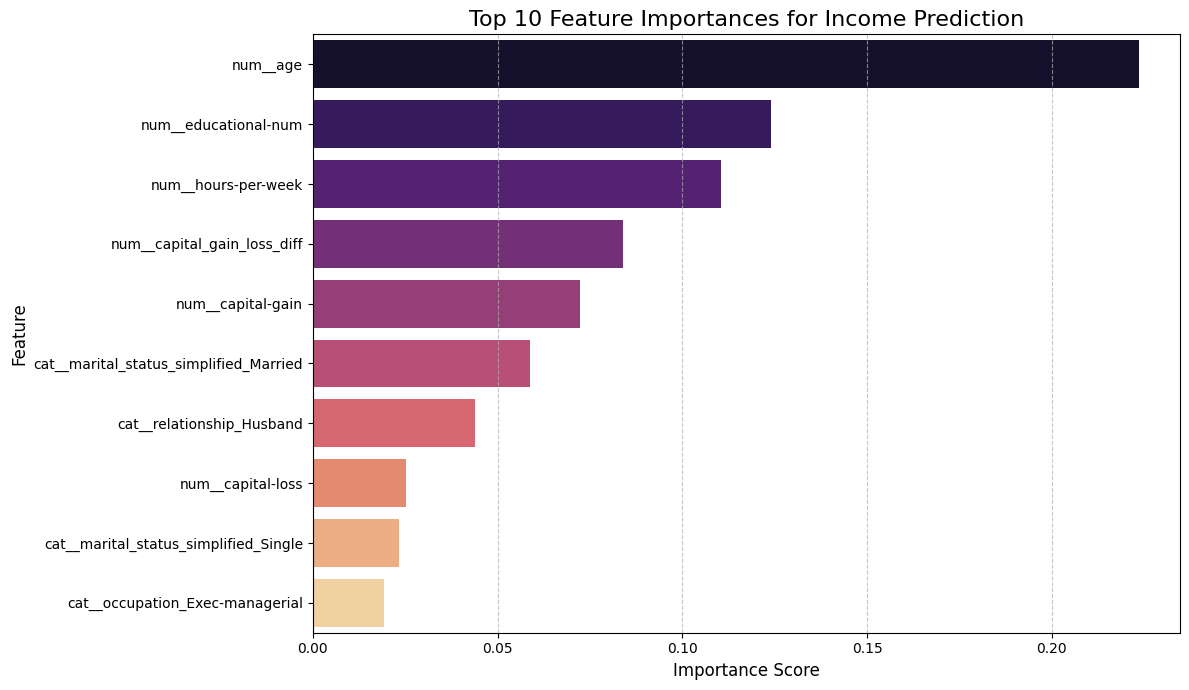


Feature importance analysis complete. This shows me what factors my model considers most significant.


In [14]:
# Understanding which features are most important for prediction is crucial for
# model interpretability and gaining insights from the data.
# For tree-based models like RandomForest, I can extract feature importances directly.

print("--- Feature Importance Analysis (Top 10) ---")

# I need to get the feature names after the OneHotEncoder has transformed them.
# The `get_feature_names_out()` method of the preprocessor helps with this.
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
# Then, I get the importances from the trained classifier.
importances = model_pipeline.named_steps['classifier'].feature_importances_

# I'll create a Pandas Series for easy sorting and visualization of importances.
feature_importances = pd.Series(importances, index=feature_names)

# Display the top 10 most important features.
top_10_features = feature_importances.nlargest(10)
print("Top 10 Most Important Features:")
print(top_10_features)

# Visualize the top 10 features to make them easily understandable.
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='magma')
plt.title('Top 10 Feature Importances for Income Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nFeature importance analysis complete. This shows me what factors my model considers most significant.")

In [15]:
# To deploy my model (e.g., in a web application), I need to save the entire trained pipeline.
# This ensures that both the preprocessing steps and the trained model are saved together,
# so predictions can be made consistently in the future.

print("--- Saving the Trained Model Pipeline ---")

# I'll use Python's 'pickle' module to serialize (save) the 'model_pipeline' object.
# This will create a file named 'model_pipeline.pkl'.
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)

print("Model pipeline successfully saved as 'model_pipeline.pkl'.")
print("This file can now be used by my Streamlit application for making predictions!")

--- Saving the Trained Model Pipeline ---
Model pipeline successfully saved as 'model_pipeline.pkl'.
This file can now be used by my Streamlit application for making predictions!
